<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/quantum_circuit_helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 安裝並 import qiskit套件

In [8]:
!pip install qiskit
!pip install qiskit[visualization]

In [20]:
!pip install qiskit-aer
!pip install qiskit-aer-gpu
!pip install qiskit-tool


ERROR: Could not find a version that satisfies the requirement qiskit-tool (from versions: none)
ERROR: No matching distribution found for qiskit-tool


In [13]:
import numpy as np
from qiskit import QuantumCircuit, transpile
#from qiskit.providers.aer import AerSimulator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## 1. Build 設計量子電路


In [14]:
# Use Aer's qasm_simulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

## 量子電路視覺化

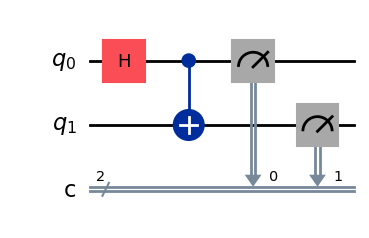

In [15]:
# Draw the circuit
circuit.draw('mpl')

## 2. Compile 編譯電路

In [16]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

## 3. Run 執行

In [17]:
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

## 4. Analyze 分析


Total count for 00 and 11 are : {'00': 523, '11': 477}



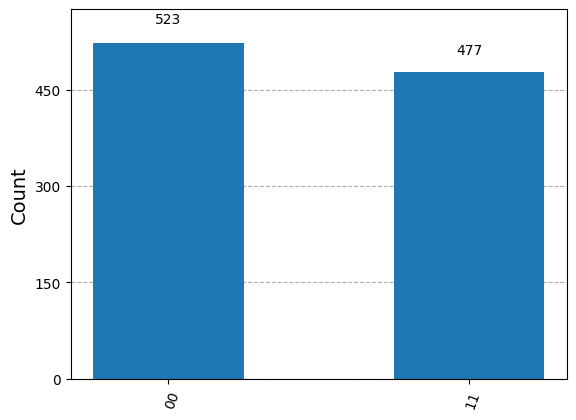

In [18]:
# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print(f"\nTotal count for 00 and 11 are : {counts}\n")

# Plot a histogram
plot_histogram(counts)

In [19]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

ModuleNotFoundError: No module named 'qiskit.tools'

In [22]:
from qiskit import *
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

ModuleNotFoundError: No module named 'qiskit.tools'

In [24]:
from qiskit import *
import qiskit.providers.ibmq.jupyter  # This is the where the magic happens (literally).

ModuleNotFoundError: No module named 'qiskit.providers.ibmq'